**About Dataset:**

16643 food images grouped in 11 major food categories

https://www.kaggle.com/datasets/trolukovich/food11-image-dataset

Classes:


Bread

Dairy product

Dessert

Egg

Fried food

Meat

Noodles-Pasta

Rice

Seafood

Soup

Vegetable-Fruit

Getting Dataset from Kaggle

Follow this 
https://www.kaggle.com/general/74235

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aashidutt3","key":"552217ce2b82423aedad0bc90e9737ff"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           3890        131  1.0              
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39          11683       1500  0.9375           
paradisejoy/top-hits-spotify-from-20002019                            Top Hits Spotify from 2000-2019                   94KB  2022-05-31 07:20:57           3496         92  1.0              
muratkokludataset/rice-image-dataset         

In [8]:
!kaggle datasets download -d trolukovich/food11-image-dataset

 98% 1.07G/1.08G [00:19<00:00, 51.9MB/s]
100% 1.08G/1.08G [00:19<00:00, 60.7MB/s]


In [9]:
!unzip food11-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: training/Soup/223.jpg   
  inflating: training/Soup/224.jpg   
  inflating: training/Soup/225.jpg   
  inflating: training/Soup/226.jpg   
  inflating: training/Soup/227.jpg   
  inflating: training/Soup/228.jpg   
  inflating: training/Soup/229.jpg   
  inflating: training/Soup/23.jpg    
  inflating: training/Soup/230.jpg   
  inflating: training/Soup/231.jpg   
  inflating: training/Soup/232.jpg   
  inflating: training/Soup/233.jpg   
  inflating: training/Soup/234.jpg   
  inflating: training/Soup/235.jpg   
  inflating: training/Soup/236.jpg   
  inflating: training/Soup/237.jpg   
  inflating: training/Soup/238.jpg   
  inflating: training/Soup/239.jpg   
  inflating: training/Soup/24.jpg    
  inflating: training/Soup/240.jpg   
  inflating: training/Soup/241.jpg   
  inflating: training/Soup/242.jpg   
  inflating: training/Soup/243.jpg   
  inflating: training/Soup/244.jpg   
  inflating: training/Soup/245.jpg   

In [10]:
# Train, test and validation set
traindir = '/content/training'
testdir = '/content/evaluation'
valdir = '/content/validation'

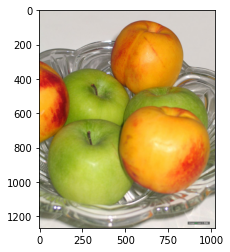

In [11]:
# Data analysis

import matplotlib.pyplot as plt
image = plt.imread('validation/Vegetable-Fruit/99.jpg')
plt.imshow(image)

In [12]:
#imports

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, AveragePooling2D, Flatten, Conv2D
from tensorflow.keras import Sequential

In [13]:
# Data prep
size = (331, 331)
batch_size = 32

train = tf.keras.preprocessing.image.ImageDataGenerator(   
    
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
)

train_generator = train.flow_from_directory(
    traindir,
    target_size = size,
    batch_size = batch_size,
    color_mode = 'rgb',
    shuffle = True,
    seed = 42,
    class_mode = 'categorical'
)

Found 9866 images belonging to 11 classes.


In [14]:
val = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
val_generator = val.flow_from_directory(
    valdir,
    target_size = size,
    batch_size = batch_size,
    color_mode = 'rgb',
    shuffle = False,
    class_mode = 'categorical'
)

Found 3430 images belonging to 11 classes.


In [15]:
test = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_generator = test.flow_from_directory(
    testdir,
    target_size = size,
    batch_size = batch_size,
    color_mode = 'rgb',
    shuffle = False,
    class_mode = 'categorical'
)

Found 3347 images belonging to 11 classes.


In [16]:
labels = list(train_generator.class_indices.keys())
print(labels)

['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


In [17]:
# Model
baseModel = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape=(331, 331, 3),
                                               include_top=False,
                                               weights='imagenet')

219070464/219055592 [==============================] - 1s 0us/step


In [18]:
num_classes = len(labels)

In [19]:
baseModel.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 331, 331, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 165, 165, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 165, 165, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                               

In [45]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size = (5,5))(headModel)
headModel = Flatten()(headModel)
headModel = Dense(128, activation ='relu')(headModel)
#headModel = Dropout(0.5)(headModel)

headModel = Dense(num_classes, activation = 'softmax')(headModel)
model = Model(inputs = baseModel.input, outputs = headModel)

for layer in baseModel.layers:
  layer.trainable= False


In [46]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 331, 331, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 165, 165, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 165, 165, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [47]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adamax', metrics =['Accuracy'])

In [48]:
Epochs = 8
#step_size_train = train_generator.n // train_generator.batch_size
#step_size_test = test_generator.n // test_generator.batch_size
#step_size_val = val_generator.n // val_generator.batch_size

#History = model.fit(train_generator,steps_per_epoch=step_size_train, validation_data = val_generator,validation_steps = step_size_val, epochs = Epochs)
History = model.fit(train_generator, validation_data= val_generator, epochs = Epochs)

Epoch 1/8
309/309 [==============================] - 360s 1s/step - loss: 1.2070 - Accuracy: 0.6327 - val_loss: 0.8709 - val_Accuracy: 0.7306
Epoch 2/8
309/309 [==============================] - 345s 1s/step - loss: 0.9645 - Accuracy: 0.7026 - val_loss: 0.8094 - val_Accuracy: 0.7490
Epoch 3/8
309/309 [==============================] - 344s 1s/step - loss: 0.8911 - Accuracy: 0.7216 - val_loss: 0.7669 - val_Accuracy: 0.7583
Epoch 4/8
309/309 [==============================] - 344s 1s/step - loss: 0.8870 - Accuracy: 0.7233 - val_loss: 0.7311 - val_Accuracy: 0.7676
Epoch 5/8
309/309 [==============================] - 344s 1s/step - loss: 0.8496 - Accuracy: 0.7348 - val_loss: 0.7225 - val_Accuracy: 0.7691
Epoch 6/8
309/309 [==============================] - 344s 1s/step - loss: 0.8245 - Accuracy: 0.7444 - val_loss: 0.7132 - val_Accuracy: 0.7720
Epoch 7/8
309/309 [==============================] - 343s 1s/step - loss: 0.8206 - Accuracy: 0.7386 - val_loss: 0.7004 - val_Accuracy: 0.7793
Epoch 

In [29]:
# Make Model Predictions and Get Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

prediction = model.predict(test_generator)
results = prediction.argmax(axis = -1)

print(classification_report(test_generator.classes, results, target_names=labels))

                 precision    recall  f1-score   support

          Bread       0.73      0.76      0.75       368
  Dairy product       0.77      0.49      0.60       148
        Dessert       0.74      0.75      0.75       500
            Egg       0.72      0.60      0.66       335
     Fried food       0.79      0.66      0.72       287
           Meat       0.70      0.84      0.77       432
  Noodles-Pasta       0.90      0.93      0.92       147
           Rice       0.88      0.93      0.90        96
        Seafood       0.77      0.77      0.77       303
           Soup       0.93      0.94      0.94       500
Vegetable-Fruit       0.81      0.89      0.85       231

       accuracy                           0.78      3347
      macro avg       0.79      0.78      0.78      3347
   weighted avg       0.78      0.78      0.78      3347



In [30]:
print(confusion_matrix(results, test_generator.classes))

[[280   6  20  39  18   9   0   0   7   2   1]
 [  3  73   9   4   0   1   0   0   3   2   0]
 [ 16  24 376  25  17  16   0   2  16  12   5]
 [ 20   4  16 202  11   8   2   1  10   2   4]
 [ 22   7   5   4 190  10   0   0   4   0   0]
 [ 22  14  28  31  32 365   0   2  17   0   8]
 [  0   0   1   3   1   4 137   0   3   2   1]
 [  0   0   3   2   2   1   1  89   2   1   0]
 [  1  17  15  10   6   9   1   0 234   5   6]
 [  0   1  15   3   8   3   5   0   2 472   0]
 [  4   2  12  12   2   6   1   2   5   2 206]]


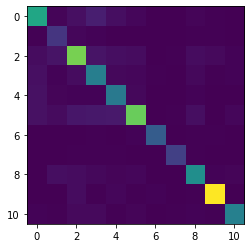

In [31]:
plt.imshow(confusion_matrix(results, test_generator.classes))